In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context
pd.set_option('display.max_rows', 200)
#sc.logging.print_versions() 
sc.logging.print_header()
sc.settings.verbosity = 3  
sc.settings.set_figure_params(dpi=120, color_map='viridis')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


In [2]:
#steroid_pos_only = sc.read('/home/jovyan/scripts/renal_covid_19/scripts_for_publication/trend_of_cell_with_steroid/steroid_pos_only_all_myeloid.h5ad') # all myeloid
steroid_pos_only = sc.read('/home/jovyan/scripts/renal_covid_19/scripts_for_publication/trend_of_cell_with_steroid/steroid_pos_only_all_T.h5ad') #all T

In [3]:
steroid_pos_only.obs['annot4'] = steroid_pos_only.obs['final_anno'] #for T cell only

In [4]:
len(list(steroid_pos_only.obs['annot4'].unique()))

14

In [5]:
steroid_pos_only.obs['steroid_status'].unique()

['steroid_positive']
Categories (1, object): ['steroid_positive']

In [ ]:
# skip this cells when running T cells
steroid_pos_only.obs['annot4'] = steroid_pos_only.obs['annot4'].str.replace('CD14mono_activated','CD14mono')
steroid_pos_only.obs['annot4'] = steroid_pos_only.obs['annot4'].str.replace('CD14mono_anti_inflammatory','alternatively_activated_monocyte')

In [6]:
len(list(steroid_pos_only.obs['annot4'].unique()))

14

In [7]:
steroid_pos_only.obs['days_from_steroid'].unique()

array([ -1,   7,   5,  18,   2,  -5,  14,  11, -10,   9,  -3,   1,  -6,
         6,   4,  -4,  13,   0,  -2,  -8])

In [8]:
list(steroid_pos_only.obs['patient_id'].unique())

['C101', 'C138', 'C145', 'C147', 'C146', 'C33']

In [9]:
pd.crosstab(steroid_pos_only.obs['days_from_steroid'],steroid_pos_only.obs['WHO_severity'])

WHO_severity,critical,moderate,severe
days_from_steroid,,,
-10,0,0,2002
-8,0,0,1264
-6,3401,0,213
-5,0,674,0
-4,262,0,0
-3,1002,0,2176
-2,0,1863,0
-1,1582,0,256
0,0,458,0


# C138 

In [10]:
C138 =steroid_pos_only[steroid_pos_only.obs['patient_id'].isin(['C138'])]

In [11]:
df_138 =pd.crosstab(C138.obs['days_from_steroid'],C138.obs['annot4'],)
df_138

annot4,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg
days_from_steroid,,,,,,,,,,,,,,
-5,1,3,296,30,8,14,24,6,222,0,17,1,51,1
-2,2,6,935,116,23,50,79,60,479,1,37,7,63,5
0,1,0,229,19,3,16,19,2,142,0,6,2,17,2
2,0,0,168,37,2,9,4,9,52,0,2,0,4,1
5,0,2,325,84,3,136,80,25,238,0,54,20,51,7
7,0,3,85,13,2,15,23,7,94,0,14,2,14,3


In [12]:
df_138['days_from_steroid'] = df_138.index # making index into column
df_138

annot4,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg,days_from_steroid
days_from_steroid,,,,,,,,,,,,,,,
-5,1,3,296,30,8,14,24,6,222,0,17,1,51,1,-5
-2,2,6,935,116,23,50,79,60,479,1,37,7,63,5,-2
0,1,0,229,19,3,16,19,2,142,0,6,2,17,2,0
2,0,0,168,37,2,9,4,9,52,0,2,0,4,1,2
5,0,2,325,84,3,136,80,25,238,0,54,20,51,7,5
7,0,3,85,13,2,15,23,7,94,0,14,2,14,3,7


In [13]:
cols = list(df_138.columns)
cols = cols[:-1]
df_138[cols] = df_138[cols].div(df_138[cols].sum(axis=1), axis=0).multiply(100)

# C101

In [14]:
C101 =steroid_pos_only[steroid_pos_only.obs['patient_id'].isin(['C101'])]

In [15]:
df_101 =pd.crosstab(C101.obs['days_from_steroid'],C101.obs['annot4'],)
df_101

annot4,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg
days_from_steroid,,,,,,,,,,,,,,
-1,2,0,30,1,3,24,16,4,169,0,6,0,1,0
4,0,1,34,3,3,17,0,2,129,0,0,3,0,0
6,1,0,102,22,8,107,36,12,451,0,15,4,3,0
11,0,0,55,6,5,141,55,90,209,1,29,17,1,4
13,1,0,119,12,14,104,90,72,637,1,45,34,0,4


In [16]:
df_101['days_from_steroid'] = df_101.index # making index into column
df_101

annot4,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg,days_from_steroid
days_from_steroid,,,,,,,,,,,,,,,
-1,2,0,30,1,3,24,16,4,169,0,6,0,1,0,-1
4,0,1,34,3,3,17,0,2,129,0,0,3,0,0,4
6,1,0,102,22,8,107,36,12,451,0,15,4,3,0,6
11,0,0,55,6,5,141,55,90,209,1,29,17,1,4,11
13,1,0,119,12,14,104,90,72,637,1,45,34,0,4,13


In [17]:
cols = list(df_101.columns)
cols = cols[:-1]
df_101[cols] = df_101[cols].div(df_101[cols].sum(axis=1), axis=0).multiply(100)

# C145

In [18]:
C145 =steroid_pos_only[steroid_pos_only.obs['patient_id'].isin(['C145'])]

In [19]:
df_145 =pd.crosstab(C145.obs['days_from_steroid'],C145.obs['annot4'],)
df_145

annot4,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 Mem,T CD8 Naive,T g/d,T reg
days_from_steroid,,,,,,,,,,,,,
2,1,1,212,9,11,83,36,5,191,6,0,4,0
7,0,0,45,4,8,22,4,0,38,1,0,1,0
9,0,0,254,16,7,97,15,1,97,7,0,1,0
14,0,2,177,17,6,145,49,12,125,18,16,6,1
18,0,2,168,11,11,152,47,2,225,43,9,4,0


In [20]:
df_145['days_from_steroid'] = df_145.index # making index into column
df_145

annot4,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 Mem,T CD8 Naive,T g/d,T reg,days_from_steroid
days_from_steroid,,,,,,,,,,,,,,
2,1,1,212,9,11,83,36,5,191,6,0,4,0,2
7,0,0,45,4,8,22,4,0,38,1,0,1,0,7
9,0,0,254,16,7,97,15,1,97,7,0,1,0,9
14,0,2,177,17,6,145,49,12,125,18,16,6,1,14
18,0,2,168,11,11,152,47,2,225,43,9,4,0,18


In [21]:
cols = list(df_145.columns)
cols = cols[:-1]
df_145[cols] = df_145[cols].div(df_145[cols].sum(axis=1), axis=0).multiply(100)

# C147

In [22]:
C147 =steroid_pos_only[steroid_pos_only.obs['patient_id'].isin(['C147'])]

In [23]:
df_147 =pd.crosstab(C147.obs['days_from_steroid'],C147.obs['annot4'],)
df_147

annot4,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg
days_from_steroid,,,,,,,,,,,,,,
-3,1,6,358,18,15,30,49,11,486,0,24,1,3,0
2,0,8,815,45,65,78,70,59,1133,0,47,10,5,3
6,0,5,342,28,14,25,55,25,308,4,36,7,6,1
9,0,2,376,20,5,38,51,39,230,0,48,15,3,4
11,0,4,186,13,12,38,55,12,268,1,50,23,7,6


In [24]:
df_147['days_from_steroid'] = df_147.index # making index into column
df_147

annot4,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg,days_from_steroid
days_from_steroid,,,,,,,,,,,,,,,
-3,1,6,358,18,15,30,49,11,486,0,24,1,3,0,-3
2,0,8,815,45,65,78,70,59,1133,0,47,10,5,3,2
6,0,5,342,28,14,25,55,25,308,4,36,7,6,1,6
9,0,2,376,20,5,38,51,39,230,0,48,15,3,4,9
11,0,4,186,13,12,38,55,12,268,1,50,23,7,6,11


In [25]:
cols = list(df_147.columns)
cols = cols[:-1]
df_147[cols] = df_147[cols].div(df_147[cols].sum(axis=1), axis=0).multiply(100)

# C146

In [26]:
C146 =steroid_pos_only[steroid_pos_only.obs['patient_id'].isin(['C146'])]

In [27]:
df_146 =pd.crosstab(C146.obs['days_from_steroid'],C146.obs['annot4'],)
df_146

annot4,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg
days_from_steroid,,,,,,,,,,,,,,
-10,0,2,151,19,77,149,97,42,1367,0,63,15,19,1
-8,0,1,102,8,30,60,55,34,857,0,103,7,6,1
-6,0,0,37,4,16,12,7,5,128,0,2,1,1,0
-3,3,3,163,17,60,139,54,30,1403,1,272,21,10,0
1,1,2,179,12,19,44,28,2,643,0,114,9,3,0
5,0,1,67,6,4,48,29,15,301,0,53,9,3,3


In [28]:
df_146['days_from_steroid'] = df_146.index # making index into column
df_146

annot4,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg,days_from_steroid
days_from_steroid,,,,,,,,,,,,,,,
-10,0,2,151,19,77,149,97,42,1367,0,63,15,19,1,-10
-8,0,1,102,8,30,60,55,34,857,0,103,7,6,1,-8
-6,0,0,37,4,16,12,7,5,128,0,2,1,1,0,-6
-3,3,3,163,17,60,139,54,30,1403,1,272,21,10,0,-3
1,1,2,179,12,19,44,28,2,643,0,114,9,3,0,1
5,0,1,67,6,4,48,29,15,301,0,53,9,3,3,5


In [29]:
cols = list(df_146.columns)
cols = cols[:-1]
df_146[cols] = df_146[cols].div(df_146[cols].sum(axis=1), axis=0).multiply(100)

# C33

In [30]:
C33 =steroid_pos_only[steroid_pos_only.obs['patient_id'].isin(['C33'])]

In [31]:
df_33 =pd.crosstab(C33.obs['days_from_steroid'],C33.obs['annot4'],)
df_33

annot4,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg
days_from_steroid,,,,,,,,,,,,,,
-6,1,1,1852,10,125,453,171,52,639,2,60,6,25,4
-4,0,0,188,4,9,16,4,0,38,0,2,0,1,0
-1,1,1,843,17,54,264,60,6,288,2,35,2,7,2
6,0,0,140,3,4,74,19,13,31,0,10,6,2,5


In [32]:
df_33['days_from_steroid'] = df_33.index # making index into column
df_33

annot4,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg,days_from_steroid
days_from_steroid,,,,,,,,,,,,,,,
-6,1,1,1852,10,125,453,171,52,639,2,60,6,25,4,-6
-4,0,0,188,4,9,16,4,0,38,0,2,0,1,0,-4
-1,1,1,843,17,54,264,60,6,288,2,35,2,7,2,-1
6,0,0,140,3,4,74,19,13,31,0,10,6,2,5,6


In [33]:
cols = list(df_33.columns)
cols = cols[:-1]
df_33[cols] = df_33[cols].div(df_33[cols].sum(axis=1), axis=0).multiply(100)

# combined plot

In [34]:
(list(df_145.columns))

['ILC',
 'MAIT',
 'NK',
 'NK CD56 bright',
 'NKT',
 'T CD4 CTL',
 'T CD4 Helper',
 'T CD4 Naive',
 'T CD8 CTL',
 'T CD8 Mem',
 'T CD8 Naive',
 'T g/d',
 'T reg',
 'days_from_steroid']

In [35]:
cell_to_plot ='NK'

Text(0.1, 0.5, 'cell counts')

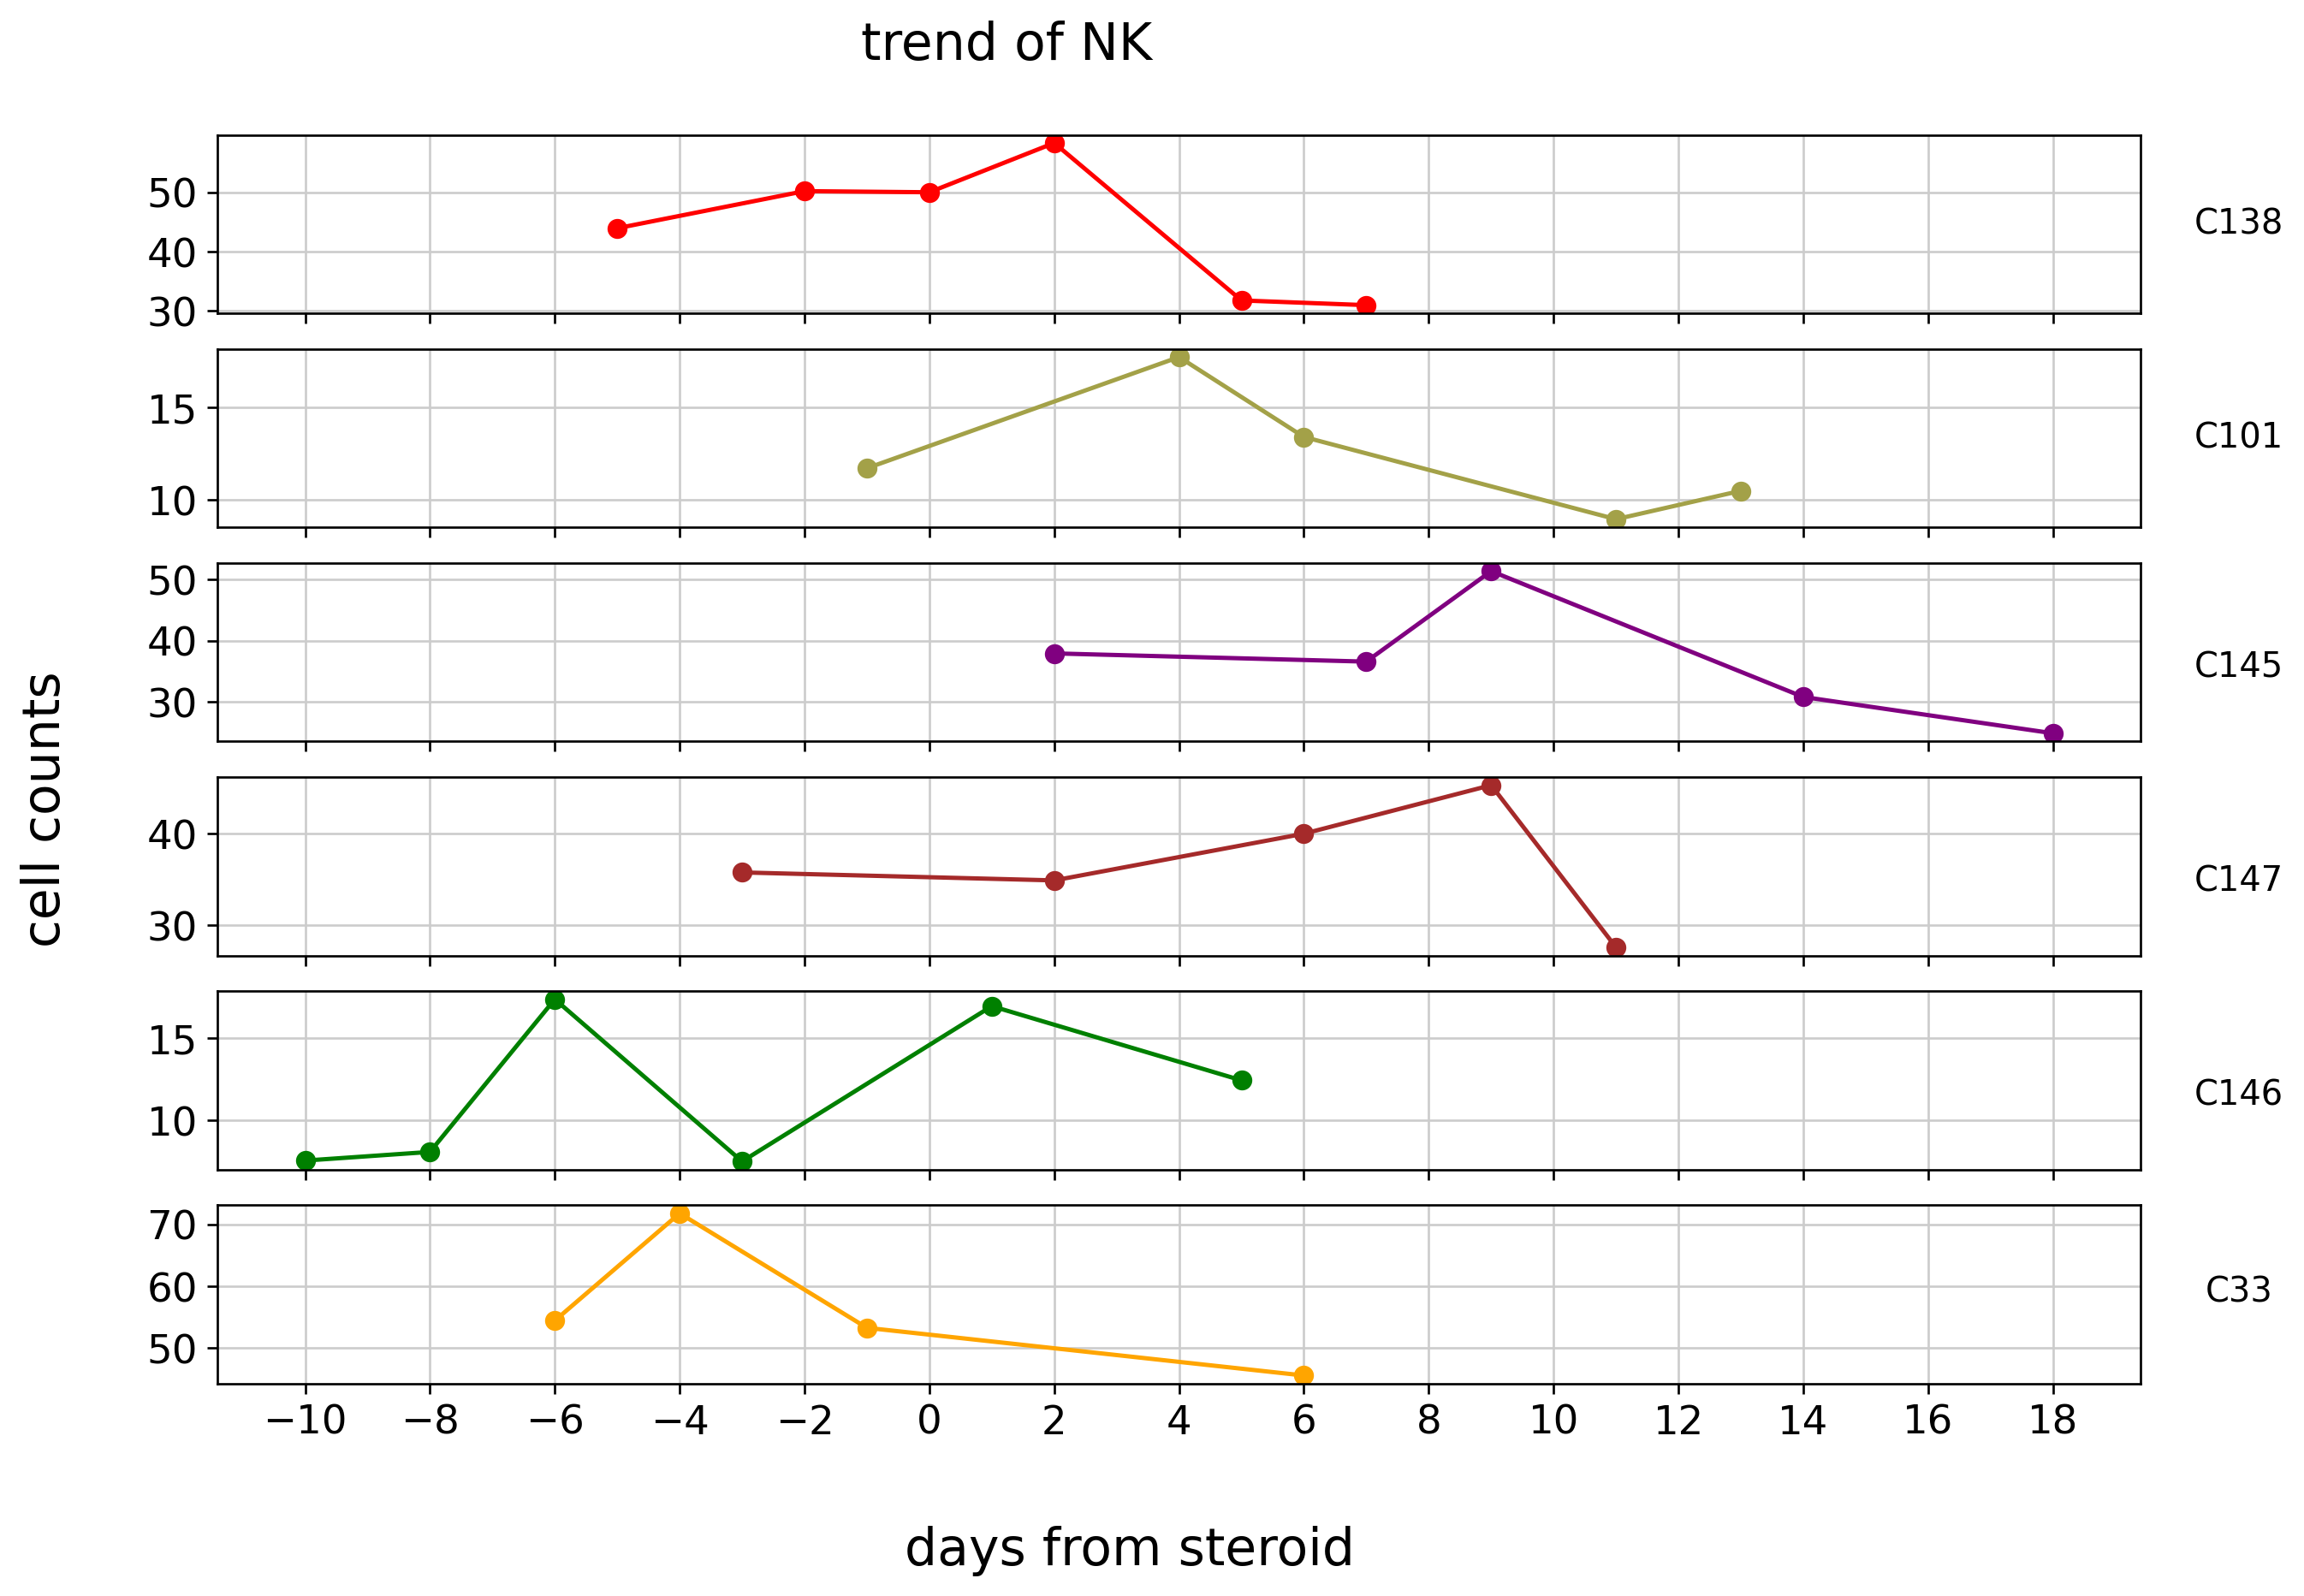

In [36]:
fig, axs = plt.subplots(nrows=6,ncols=1,sharex=True,figsize=(12,8))
fig.suptitle('trend of '+cell_to_plot,fontsize=18)
axs[0].set_xticks(np.arange(-18,19,2))

axs[0].plot(df_138['days_from_steroid'],df_138[cell_to_plot],'o-',color='red' )
fig.text(1, 0.85, 'C138', ha='center',fontsize=12)

axs[1].plot(df_101['days_from_steroid'],df_101[cell_to_plot],'o-' ,color='#a3a148' )
fig.text(1, 0.72, 'C101', ha='center',fontsize=12)

axs[2].plot(df_145['days_from_steroid'],df_145[cell_to_plot], 'o-',color='purple' )
fig.text(1, 0.58, 'C145', ha='center',fontsize=12)

axs[3].plot(df_147['days_from_steroid'],df_147[cell_to_plot], 'o-',color='brown' )
fig.text(1, 0.45, 'C147', ha='center',fontsize=12)

axs[4].plot(df_146['days_from_steroid'],df_146[cell_to_plot], 'o-',color='green' )
fig.text(1, 0.32, 'C146', ha='center',fontsize=12)

axs[5].plot(df_33['days_from_steroid'],df_33[cell_to_plot], 'o-',color='orange' )
fig.text(1, 0.2, 'C33', ha='center',fontsize=12)

fig.text(0.55, 0.04, 'days from steroid', ha='center',fontsize=18)
fig.text(0.1, 0.5, 'cell counts', va='center', rotation='vertical',fontsize=18)
#fig.savefig('/home/jovyan/scripts/renal_covid_19/steroid_pipeline/trend_anti.png', dpi=150)

/tmp/ipykernel_5696/2842029980.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axs.plot(df_138['days_from_steroid'],df_138[cell_to_plot],'-o',color='red',linestyle=':' )
/tmp/ipykernel_5696/2842029980.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axs.plot(df_101['days_from_steroid'],df_101[cell_to_plot],'-o' ,color='#a3a148',linestyle=':')
/tmp/ipykernel_5696/2842029980.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axs.plot(df_145['days_from_steroid'],df_145[cell_to_plot], 'o-',color='purple',linestyle=':' )
/tmp/ipykernel_5696/2842029980.py:8: UserWarning: linestyle is redundantly defined by the 'line

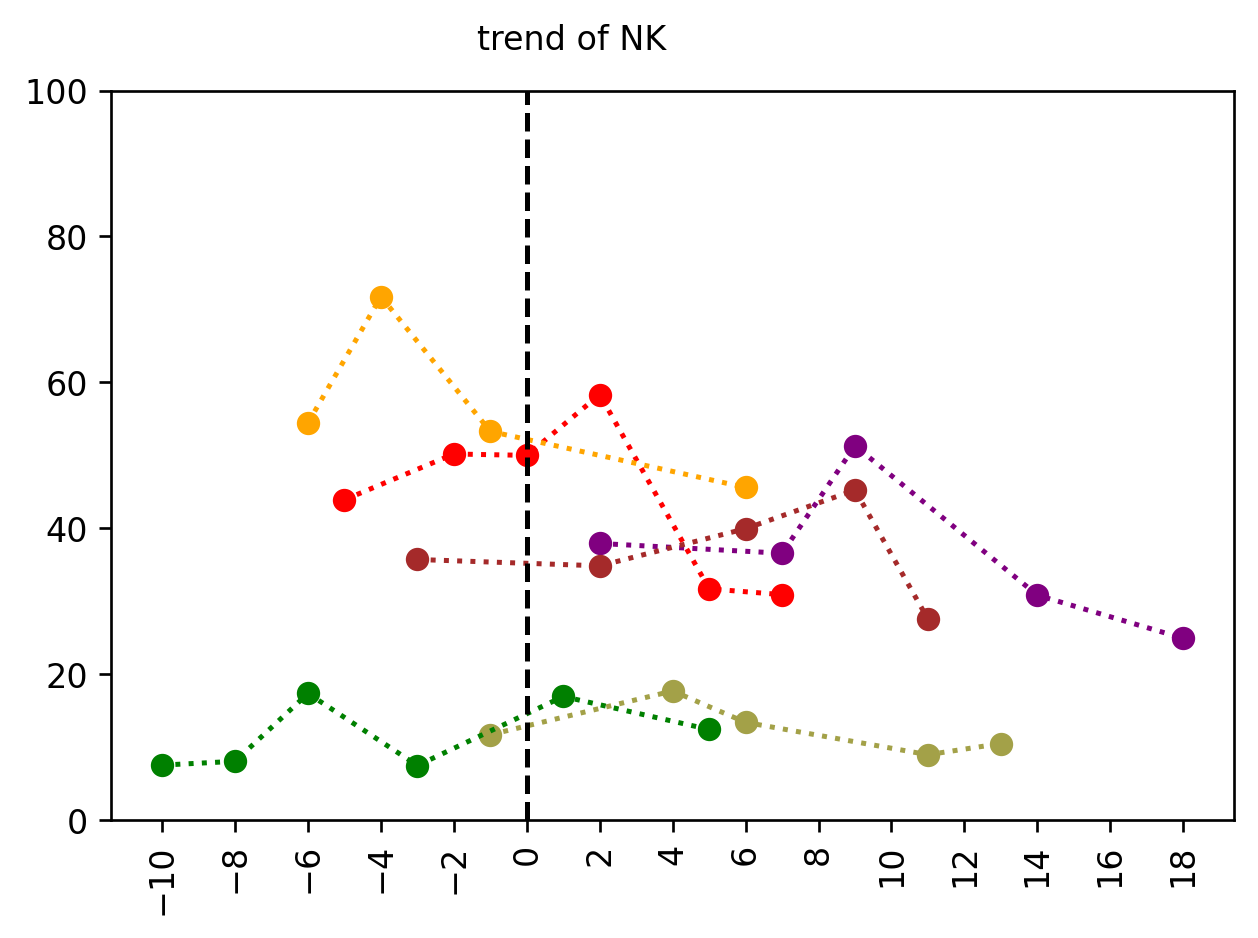

In [37]:
fig, axs = plt.subplots(figsize=(6,4))
fig.suptitle('trend of '+ cell_to_plot,fontsize=10)
axs.set_xticks(np.arange(-18,19,2))

axs.plot(df_138['days_from_steroid'],df_138[cell_to_plot],'-o',color='red',linestyle=':' )
axs.plot(df_101['days_from_steroid'],df_101[cell_to_plot],'-o' ,color='#a3a148',linestyle=':')
axs.plot(df_145['days_from_steroid'],df_145[cell_to_plot], 'o-',color='purple',linestyle=':' )
axs.plot(df_147['days_from_steroid'],df_147[cell_to_plot], 'o-',color='brown',linestyle=':' )
axs.plot(df_146['days_from_steroid'],df_146[cell_to_plot], 'o-',color='green',linestyle=':' )
axs.plot(df_33['days_from_steroid'],df_33[cell_to_plot], 'o-',color='orange' ,linestyle=':')

plt.axvline(x = 0, color = 'black',linestyle='--')
plt.ylim(0,100)
#plt.legend(['C138','C101','C145','C147','C146','C33'], handlelength=3,fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

#plt.savefig('/home/jovyan/scripts/renal_covid_19/steroid_pipeline_corrected/steroid_pipeline/figures/'+cell_to_plot+'.pdf')
plt.show()